In [1]:
# ## Problem Statement:
# 
# 2) **A binary classification Problem**
# 
# 3) **Forecast Tomorrow will be rain or not**


In [2]:
# 1. **[Import Packages](#import_packages)**
# 2. **[Read Data](#Read_Data)**
# 3. **[Understand and Process the Data](#Data_Processing)**
#     - 3.1 - [Data Types and Dimensions](#Data_Types)
#     - 3.2 - [Handling Missing values](#missing)
#     - 3.3 - [Handle the Outliers](#outliers)
#     - 3.4 - [Visualization of the numeric columns](#visualisation)
#     - 3.5 - [Converting Categorical columns to the numeric column](#cat_numeric)
#     - 3.6 - [Checking Multicollinearity](#multicollinearity)
#     - 3.7 - [Over Sampling Using SMOTE](#over_sampling)
# 

In [ ]:
4. #[Sampling](#sampling)
#    - 4.1 - [Feature_Scaling](#feature_scaling)


In [ ]:
5. #(model_building)  
#    - 5.1 - [Logistic](#logistic)
#    - 5.2 - [Decision Tree Classifier](#decision)


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\hp\Downloads\weatherAUS.csv\weatherAUS.csv")

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [6]:
df.shape

(145460, 23)

In [7]:
df.describe()  #for numeric columns

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [8]:
df.isnull().sum()   #checking the nulls

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [9]:
#numerical features extraction from the data

num_col = [num_col for num_col in df.columns if df[num_col].dtype !="O"]

In [10]:
#checking nulls of the Numeric column

num_col_with_null_values = [col for col in num_col if df[col].isnull().sum()]
missing_values = df[num_col_with_null_values].isnull().sum()
missing_values


MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

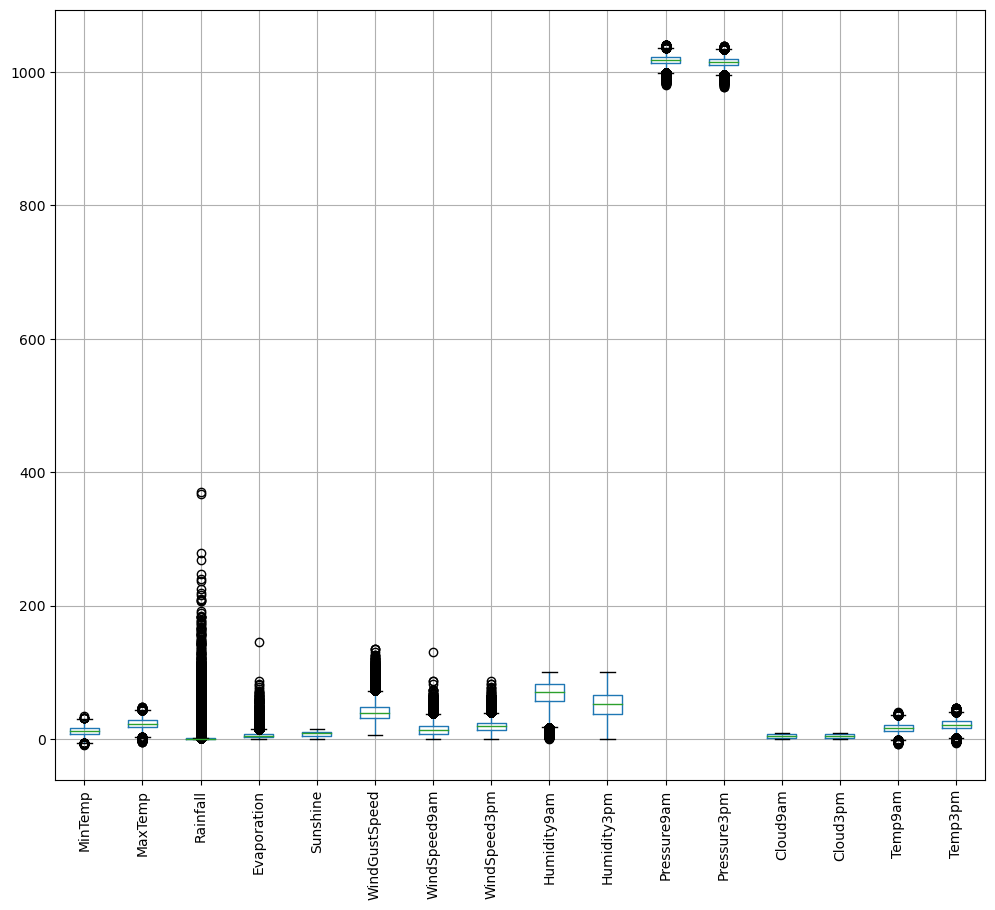

In [11]:
#Checking the outliers of the numeric columns;

plt.figure(figsize=(12,10))
df.boxplot(num_col_with_null_values,rot=90)
plt.show()

In [12]:
# Remove Outliers from Numerical Features

features_with_outliers = num_col_with_null_values
for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit, feature] = lower_limit
    df.loc[df[feature]>upper_limit, feature] = upper_limit

<AxesSubplot:>

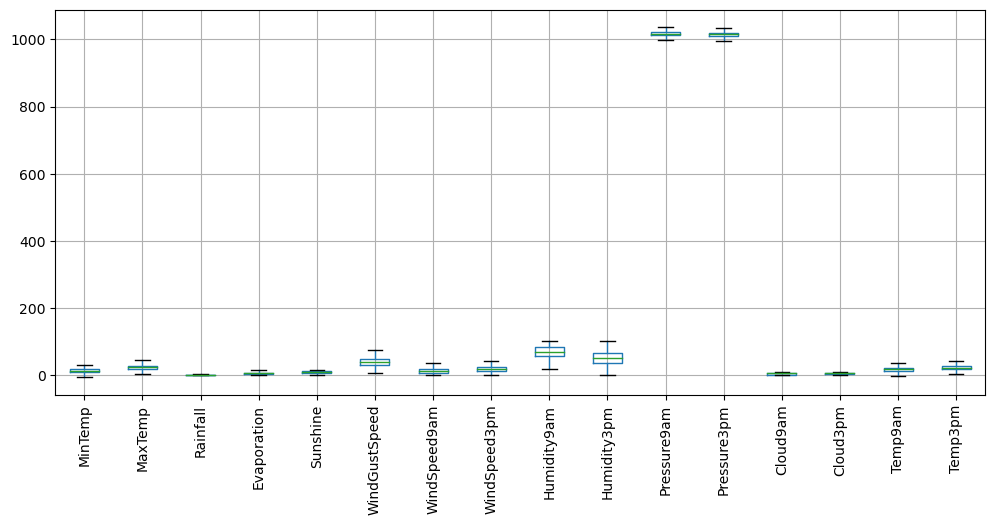

In [13]:
plt.figure(figsize=(12,5))
df.boxplot(features_with_outliers,rot = 90)

<AxesSubplot:>

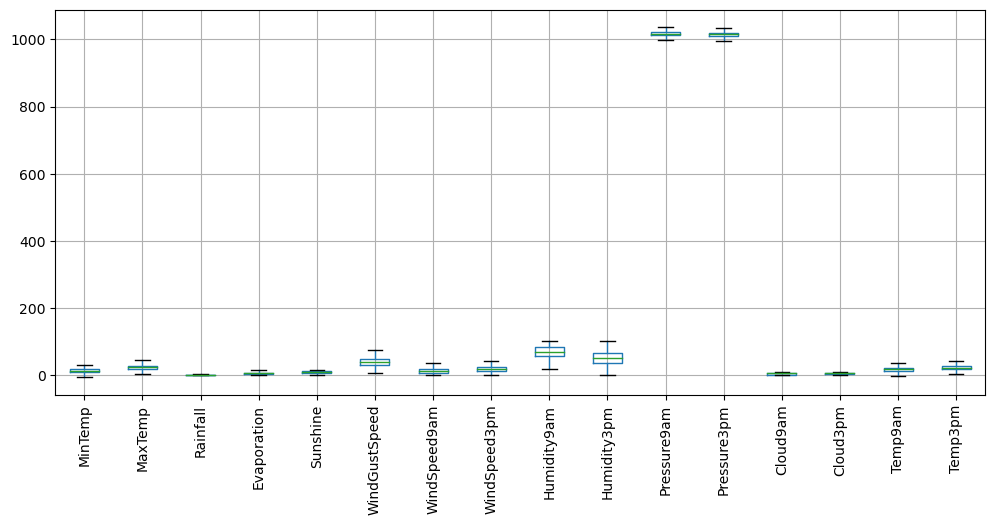

In [14]:
#after removing the outliers..

plt.figure(figsize=(12,5))
df.boxplot(features_with_outliers,rot = 90)    # we can see there is no outliers now 


In [15]:
#now we handle the missing values of numerical columns by filling the mean value.

for features in num_col_with_null_values:
    df[features] = df[features].fillna(df[features].mean())   # all missing values imputed by mean 

In [16]:
df[num_col_with_null_values].isnull().sum()  # we can see there is no null values now 

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

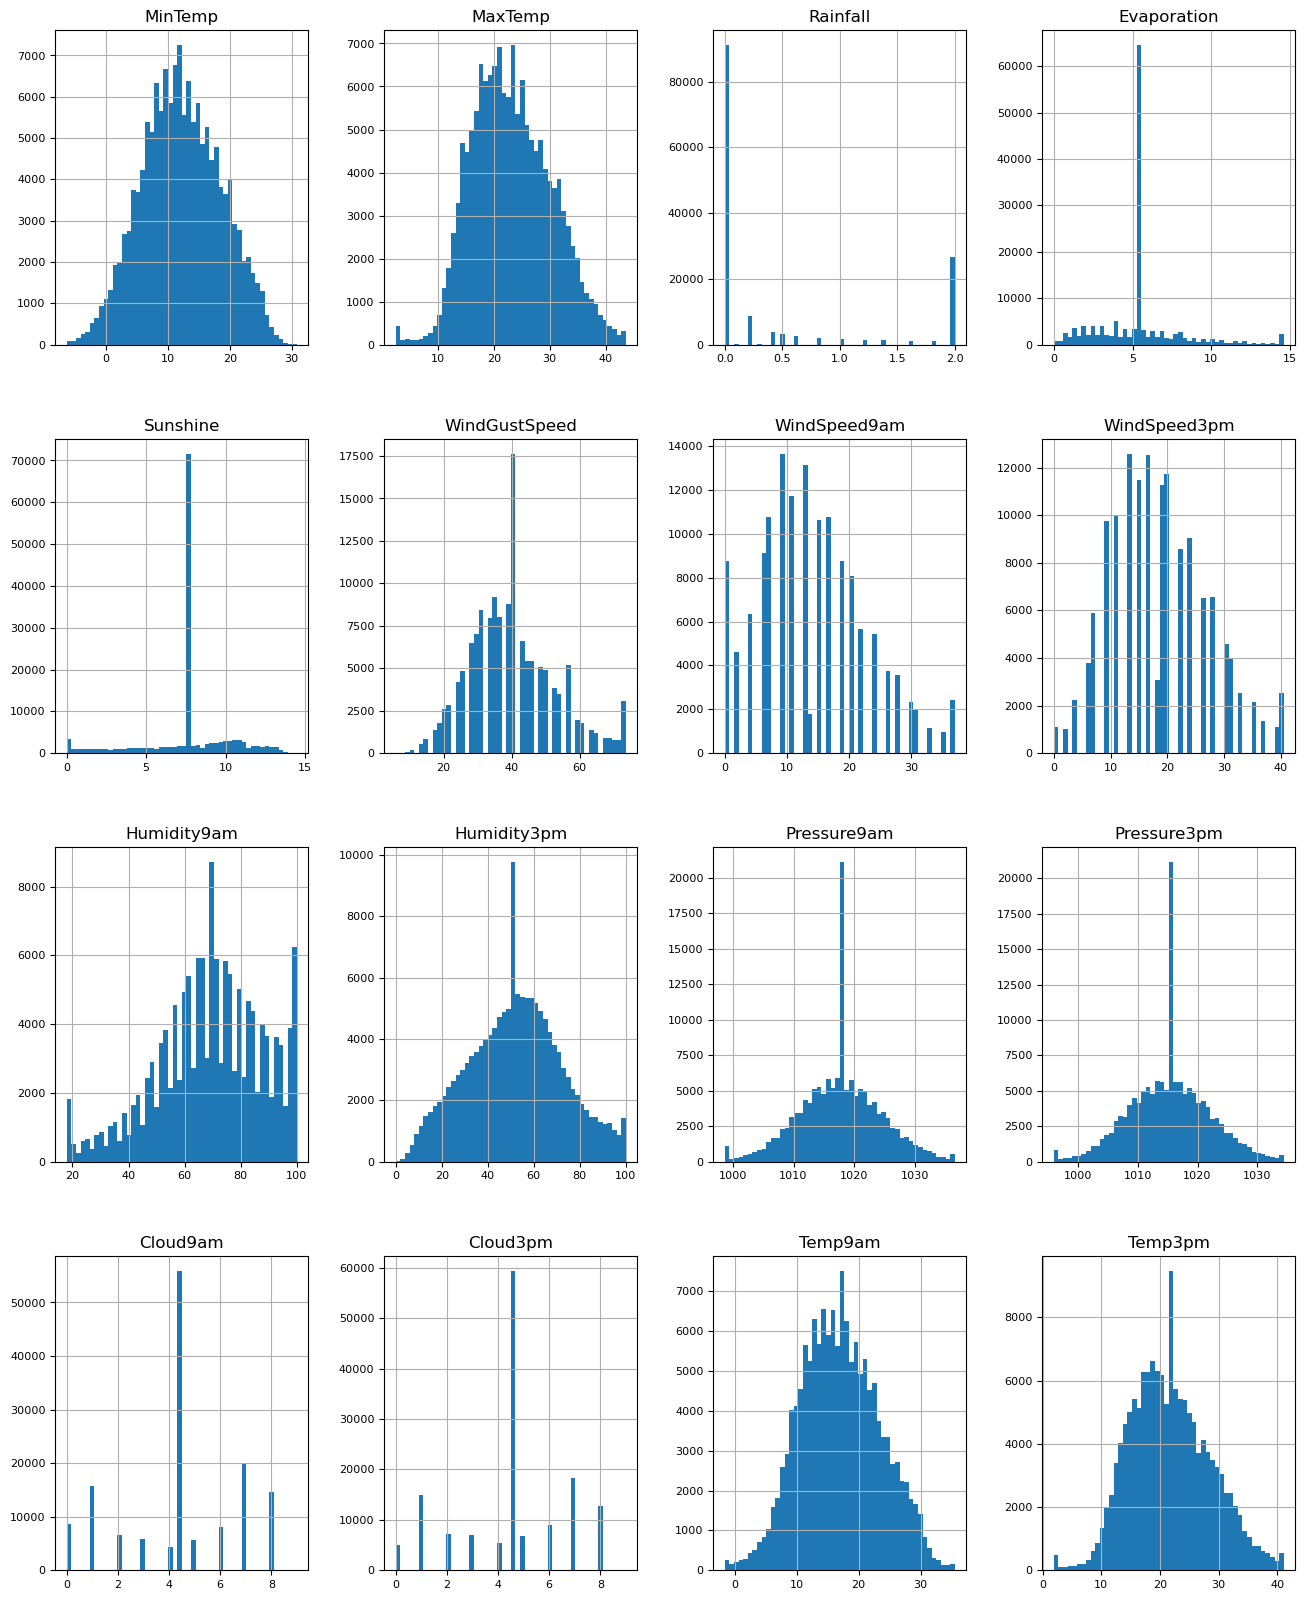

In [17]:
# Histogram for Numerical Variables

df_num = df.select_dtypes(include = ['float64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);
plt.show()

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

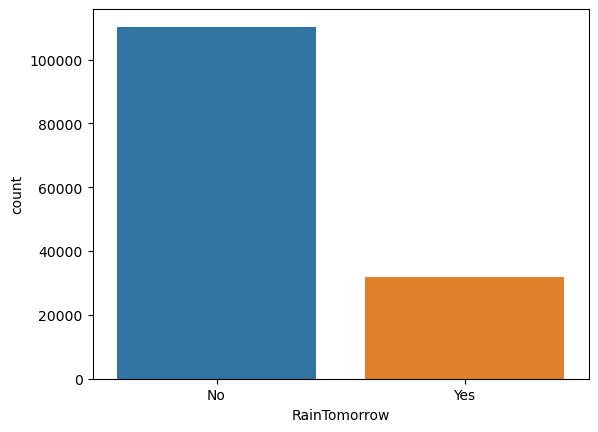

In [18]:
# Exploring Targeted Variable 

sns.countplot(df["RainTomorrow"])   

In [19]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [20]:
#  Converting Categorical columns to the numeric column
#one hot encoding: it converts categorical into numerical
#labelEncoder :- it converting the labels into numerical form so as to convert them into the machine readable form

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In [21]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,5.318667,7.611178,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,2008-12-02,2,7.4,25.1,0.0,5.318667,7.611178,14,44.0,6,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,2008-12-03,2,12.9,25.7,0.0,5.318667,7.611178,15,46.0,13,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,2008-12-04,2,9.2,28.0,0.0,5.318667,7.611178,4,24.0,9,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,2008-12-05,2,17.5,32.3,1.0,5.318667,7.611178,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


In [22]:
#One hot encoding creates the problem on my dataset ..
#that's why i create the function which gives the numeric value to each unique element of the  categorical column


In [23]:
#  Converting Date column from date format to numeric format

df["Date"] = pd.to_datetime(df["Date"])   #Converting into Date
df["Year"] = df["Date"].dt.year           #abstracting year in different column 
df["Month"] = df["Date"].dt.month         #abstracting month in diffrent column  
df["Day"] = df["Date"].dt.day             #abstracting day in diffrent column  


In [24]:
# Dropping Date Column 

df.drop("Date", axis = 1, inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,5.318667,7.611178,13,44.0,13,14,...,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12,1
1,2,7.4,25.1,0.0,5.318667,7.611178,14,44.0,6,15,...,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12,2
2,2,12.9,25.7,0.0,5.318667,7.611178,15,46.0,13,15,...,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12,3
3,2,9.2,28.0,0.0,5.318667,7.611178,4,24.0,9,0,...,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12,4
4,2,17.5,32.3,1.0,5.318667,7.611178,13,41.0,1,7,...,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12,5


In [25]:
# Finding final categorical features that is need to be turned into Numericals Encoding means numerical values 

cat_fea = [i for i in df.columns if df[i].dtype == "O"]
cat_fea 

[]

In [26]:
# here we are defining a function 

def encode_cat(feature):     # function will take feature 
   
    mapping_dic = {}         # empty dic 
    unique_val = list(df[feature].unique())    # extract particular feature from data and convert into list 
    for idx in range(len(unique_val)):      #loop will run till the len of list 
        mapping_dic[unique_val[idx]] = idx    # assign the index to the index of the list 
    return mapping_dic     

In [27]:
for i in cat_fea: 
    # we have the list of categorical features 
    df[i].replace(encode_cat(i), inplace = True)  
    print(df.head())

In [28]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,5.318667,7.611178,13,44.0,13,14,...,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12,1
1,2,7.4,25.1,0.0,5.318667,7.611178,14,44.0,6,15,...,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12,2
2,2,12.9,25.7,0.0,5.318667,7.611178,15,46.0,13,15,...,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12,3
3,2,9.2,28.0,0.0,5.318667,7.611178,4,24.0,9,0,...,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12,4
4,2,17.5,32.3,1.0,5.318667,7.611178,13,41.0,1,7,...,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12,5


In [29]:
df.info()    #non one is the object variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int32  
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  int32  
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  int32  
 9   WindDir3pm     145460 non-null  int32  
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

In [30]:
# **we have converted all categorical data into numerical values**
# **first we separtated it and then we converted into numerical**


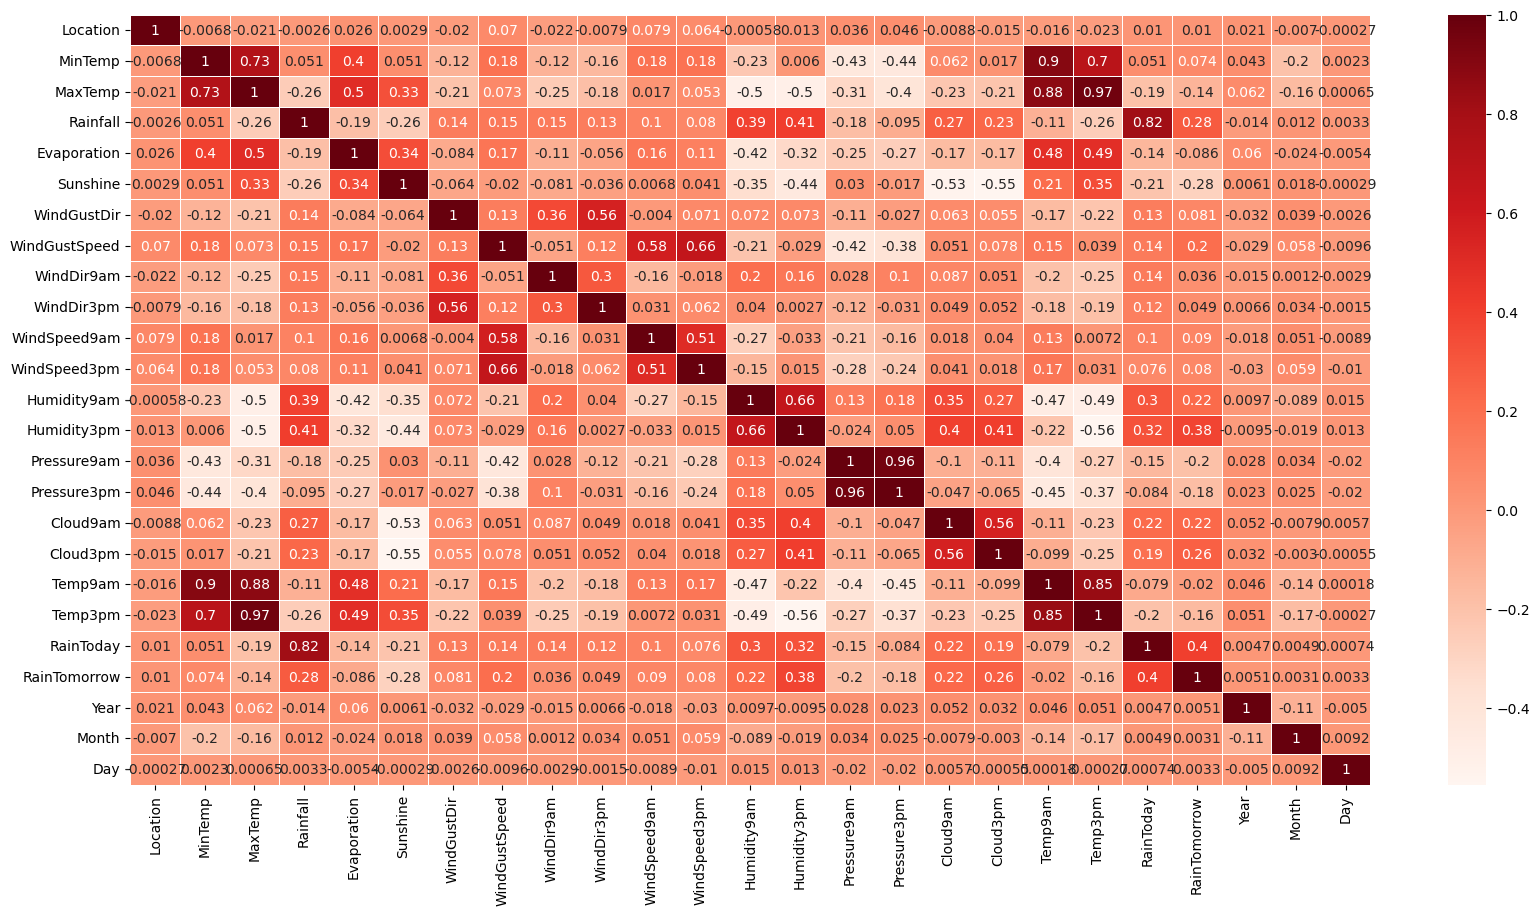

In [31]:
# lets see the correlation between eachother by using heatmap
ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap="Reds",linewidth=0.5)
plt.show()

In [32]:
# # Splitting Data

y = df["RainTomorrow"]  # dependent or target 
x = df.drop(["RainTomorrow"],axis = 1)  # indepedent or input 

In [33]:
df.shape

(145460, 25)

In [34]:
#  Over_sampling using SMOTE (Synthetic Minority Oversampling learning)
#{it is a statictical techniqe for increase the number of cases in your dataset in a balence way}

# define dataset
from collections import Counter
from sklearn.datasets import make_classification
x,y = make_classification(n_samples=145460, n_features=24, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

In [35]:
# Oversample and plot imbalanced dataset with SMOTE
#It aims to balance class distribution by randomly increasing minority class examples by replicating them


In [36]:
from imblearn.over_sampling import SMOTE               

smote=SMOTE(sampling_strategy=0.1)
x,y=smote.fit_resample(x,y)

In [37]:
print("X shape:",x.shape,"\n Y shape:",y.shape)

X shape: (158406, 24) 
 Y shape: (158406,)


In [38]:
# Sampling

from sklearn.model_selection import train_test_split   # testing and splitting 
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0 )

In [39]:
print("Length of Training Data: {}".format(len(x_train)))
print("Length of Testing Data: {}".format(len(x_test)))

Length of Training Data: 126724
Length of Testing Data: 31682


In [77]:
# Feature_scaling
#{feature scaling is a method used to normalize the range of independent variables or features of data}

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)


In [78]:
x_test = scaler.transform(x_test)

In [42]:
# Logistic (eg for supervised learning)

#{to find relationship betn to data factors.}
#{ it is used to calculate or predict the probability of a binary (yes/no) event occuring}


from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=1)

In [43]:
logreg.fit(x_train,y_train)

LogisticRegression(random_state=1)

In [47]:
# Model prediction

y_pred = logreg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
# # Accuracy of Train and Test:

print("Train Data Score: {}".format(logreg.score(x_train, y_train)))
print("Test Data Score: {}".format(logreg.score(x_test, y_test)))

Train Data Score: 0.9790016097976705
Test Data Score: 0.9780948172463859


In [49]:
# # Precision ,Recall,F1-Score

#ACCURACY:- TP+TN/TP+TN+fp+fn

#PRECISION:- TP/TP+FP

#RECALL:- tp/tp+fn

#f1= 2*precision*recall/precision+recall

#{f1 score is commonly used to measure performance of binary classification}

#Macro avg :- all classes equally contribute to the final abbg metric

#Weighted Avg:- each classes's contribution to the avg is weighted by its size


from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28824
           1       0.87      0.89      0.88      2858

    accuracy                           0.98     31682
   macro avg       0.93      0.94      0.93     31682
weighted avg       0.98      0.98      0.98     31682



In [50]:
# # Cross-Validation



from sklearn.model_selection import cross_val_score
scores=cross_val_score(logreg,x_train,y_train,cv=5,scoring='accuracy')

In [51]:
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.97912803 0.97829947 0.97814165 0.97893076 0.98003472]
Average cross-validation score: 0.9789069247166875


In [54]:
# # KNN
#{KNN is the simplest form of the ml algorithm mostly used for the classification.

#{it classifies the data point on how its neighbor is classified.

#{KNN classifies the new data points based on the similarity measure of the earlier stored data points.


from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn=KNeighborsClassifier(n_neighbors=7)

In [56]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [57]:
pred_knn=knn.predict(x_test)

In [67]:
tab_knn=confusion_matrix(pred_knn,y_test) #confusion matrix is a summary of predictions of the classification problems
tab_knn

array([[27962,    13],
       [  788,  2919]], dtype=int64)

In [68]:
##Accuracy Score**

print("Train Data Score: {}".format(knn.score(x_train, y_train)))
print("Test Data Score: {}".format(knn.score(x_test, y_test)))

Train Data Score: 0.9820318171774881
Test Data Score: 0.9747175052080046


In [69]:
# **Precision,recall,f1-score**

print(classification_report(pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     27975
           1       1.00      0.79      0.88      3707

    accuracy                           0.97     31682
   macro avg       0.98      0.89      0.93     31682
weighted avg       0.98      0.97      0.97     31682



In [70]:
# #Decision Tree Classifier

#{DT is a supervised learning algorithm,which is utilize for both classification and regression tasks}

#(min_sample_split): the minimum no of samples required to split an internal node

#(Max_depth): is a limit to stop further splitting of nodes when the specified tree depth has been reached during the 

#building of the decision tree

#(criterion: this parameter determines how the impurity of a split will be measured. the default value is gini)

#default value is set best


from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(criterion='gini', min_samples_split= 150 , max_depth= 3 , splitter='best')

In [71]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=150)

In [72]:
# # Prediction

pred_dt=dt.predict(x_test)
pred_dt

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
# # Model Accuracy

print("Train Data Score: {}".format(dt.score(x_train, y_train)))
print("Test Data Score: {}".format(dt.score(x_test, y_test)))

Train Data Score: 0.9873899182475301
Test Data Score: 0.9864276245186542


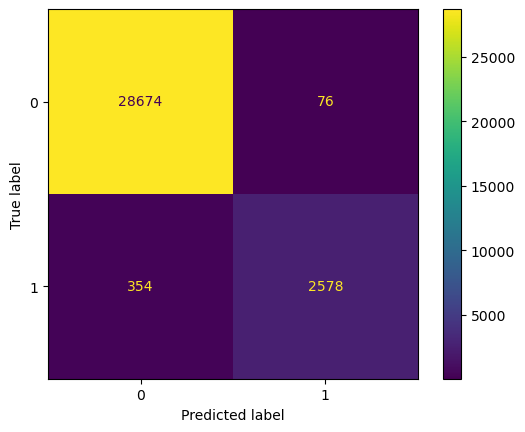

In [75]:
# **Confusion Matrix**

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, x_test,y_test)

In [76]:
# **Precision, Recall,F1-score**
print(classification_report(pred_dt,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     29028
           1       0.88      0.97      0.92      2654

    accuracy                           0.99     31682
   macro avg       0.94      0.98      0.96     31682
weighted avg       0.99      0.99      0.99     31682



In [ ]:
# **My dataset is based on weather prediction , so it is necessary to check to False positive and false negative**

# **so by observing all modles f1-Score is decided that Decision Tree is the best model for my dataset**

# **DT Model gives the good accuracy as well as DT gives good recall value than Logistic regresion..**

#**so we finalize DT Model for deployment**
